# Covid19 - Exploratory data analysis
**Table of contents:**
* Importing dependecies
* Basic data manipulation - grouping, aggregating etc.
* Model building

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [90]:
# Getting all the files in "data" directory 
list_of_files = os.walk('./data/')
list_of_files = list(list_of_files)[0][2]

# For EDA purposes I am going to use only one country as a template
DIR = './data/'
COUNTRY = 'united_kingdom.csv'

In [91]:
dataset = pd.read_csv(DIR + COUNTRY)

In [92]:
dataset.head()

,Unnamed: 0,Date,Cases,Country
0,0,2,2020-01-31,United Kingdom
1,1,2,2020-02-01,United Kingdom
2,2,2,2020-02-02,United Kingdom
3,3,8,2020-02-03,United Kingdom
4,4,8,2020-02-04,United Kingdom


In [93]:
dataset.drop(['Unnamed: 0', 'Country'], axis=1, inplace=True)
dataset['Cases'] = pd.to_datetime(dataset['Cases'])

In [94]:
# I would like to see daily new cases, sadly API only gave access to total cases.
# We know however, that new cases for day n = total cases of day n+1 - total cases of day n

In [95]:
new_cases = []
for n in range(len(dataset['Date'])):
    try:
        new_cases.append(dataset['Date'][n+1] - dataset['Date'][n])
    except KeyError:
        new_cases.append(np.NaN)

In [96]:
dataset['New_cases'] = new_cases

In [97]:
dataset.head()

,Date,Cases,New_cases
0,2,2020-01-31,0.0
1,2,2020-02-01,0.0
2,2,2020-02-02,6.0
3,8,2020-02-03,0.0
4,8,2020-02-04,1.0


In [98]:
# IMPORTANT
dataset = dataset.groupby(pd.Grouper(key='Cases',freq='W-MON')).agg({'Date':'sum', 'New_cases':'sum'})
dataset = dataset.reset_index()

In [103]:
dataset.head()

,Cases,Date,New_cases
0,2020-02-03,14,6.0
1,2020-02-10,76,7.0
2,2020-02-17,121,4.0
3,2020-02-24,165,15.0
4,2020-03-02,460,155.0


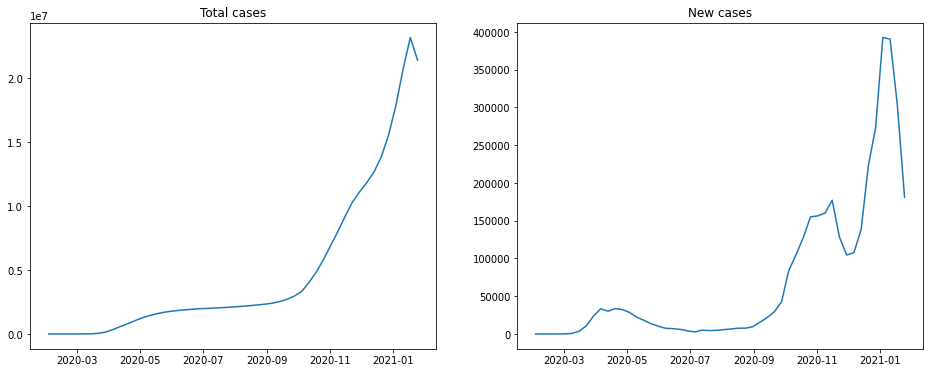

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].plot(dataset['Cases'], dataset['Date'])
ax[0].set_title('Total cases')
ax[1].plot(dataset['Cases'], dataset['New_cases'])
ax[1].set_title('New cases')
plt.show()